# Assignment 5: Model Selection for KNN

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In this assignment, you will continue practicing the fifth step of the machine learning life cycle and perform model selection to find the best performing KNN model for a classification problem.

You will complete the following tasks:

1. Build your DataFrame and define your ML problem
3. Create labeled examples from the data set
4. Split the data into training and test data sets
5. Perform a grid search to identify the optimal value of $K$ for a KNN classifier
6. Fit the optimal KNN classifier to the training data and make predictions on the test data
7. Evaluate the accuracy of the model
8. Plot a precision-recall curve for the model


<b>Note</b>: Some of the evaluation metrics we will be using are suited for binary classification models that produce probabilities. For this reason, we will be using the `predict_proba()` method to produce class label probability predictions. Recall that KNN is *not* a probabilistic method. Because of this, `predict_proba()` does not output true probabilities. What it does is the following: For n_neighbors=$k$, it identifies the closest $k$ points to a given input point. It then counts up the likelihood, among these $k$ points, of belonging to one of the classes and uses that as the class "probabilities." We will be using KNN for the sake of demonstrating how to use these evaluation metrics.

**<font color='red'>Note: Some of the code cells in this notebook may take a while to run.</font>**

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the "cell2celltrain" data set. This version of the data set has been preprocessed and is ready for modeling.

In [2]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data_KNN", "cell2celltrain.csv")

**Task**: Load the data and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
df = pd.read_csv(filename)

#### Define the Label

This is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

Our features will be all of the remaining columns in the dataset.

## Part 2. Create Labeled Examples from the Data Set 

<b>Task</b>: In the code cell below, create labeled examples from DataFrame `df`.

In [4]:
# YOUR CODE HERE
y = df["Churn"]
X = df.drop(columns = "Churn", axis = 1)

## Part 3. Create Training and Test Data Sets
<b>Task</b>: In the code cell below, create training and test sets out of the labeled examples. Create a test set that is 10 percent of the size of the data set.

In [5]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

## Part 4. Perform KNN Model Selection Using `GridSearchSV()`

Our goal is to find the optimal choice of hyperparameter $K$. We will then train a KNN model using that value of $K$.

### Set Up a Parameter Grid 

<b>Task</b>: Create a dictionary called `param_grid` that contains 10 possible hyperparameter values for $K$. The dictionary should contain the following key/value pair:

* A key called 'n_neighbors' 
* A value which is a list consisting of 10 values for the hyperparameter $K$ 

For example, your dictionary would look like this: `{'n_neighbors': [1, 2, 3,..]}`

The values for hyperparameter $K$  will be in a range that starts at $2$ and ends with $\sqrt{num\_examples}$, where `num_examples` is the number of examples in our training set `X_train`. Use the NumPy [np.linspace()](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function to generate these values, then convert each value to an `int`.

In [6]:
import math
num_examples = X_train.shape[0]
param_grid = {"n_neighbors": np.linspace(2, math.sqrt(num_examples)).astype(int)}

param_grid

{'n_neighbors': array([  2,   6,  10,  15,  19,  23,  28,  32,  36,  41,  45,  49,  54,
         58,  62,  67,  71,  75,  80,  84,  88,  93,  97, 101, 106, 110,
        114, 119, 123, 127, 132, 136, 140, 145, 149, 153, 158, 162, 166,
        171, 175, 179, 184, 188, 192, 197, 201, 205, 210, 214])}

### Perform Grid Search Cross-Validation

<b>Task:</b> Use `GridSearchCV` to search over the different values of hyperparameter $K$ to find the one that results in the best cross-validation (CV) score.

Complete the code in the cell below. <b>Note</b>: This will take a few minutes to run.

In [7]:
print('Running Grid Search...')

# 1. Create a KNeighborsClassifier model object without supplying arguments. 
#    Save the model object to the variable 'model'

# YOUR CODE HERE
model = KNeighborsClassifier()


# 2. Run a grid search with 5-fold cross-validation and assign the output to the object 'grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 5

# YOUR CODE HERE
grid = GridSearchCV(model, param_grid, cv = 5)


# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'grid_search'

# YOUR CODE HERE
grid_search = grid.fit(X_train, y_train)


print('Done')

Running Grid Search...
Done


<b>Task</b>: Retrieve the value of the hyperparameter $K$ for which the best score was attained. Save the result to the variable `best_k`. Print the result.

In [8]:
# YOUR CODE HERE
best_k = grid_search.best_estimator_.n_neighbors
best_k

80

## Part 5. Train the Optimal KNN Model and Make Predictions

<b>Task</b>: Initialize a `KNeighborsClassifier` model object with the best value of hyperparameter `K` and fit the model to the training data. The model object should be named `model_best`.

In [9]:
# YOUR CODE HERE
model_best = KNeighborsClassifier(n_neighbors = best_k)
model_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=80)

<b>Task:</b> Test your model on the test set (`X_test`).

1. Use the ``predict_proba()`` method  to use the fitted model `model_best` to predict class probabilities for the test set. Note that the `predict_proba()` method returns two columns, one column per class label. The first column contains the probability that an unlabeled example belongs to class `False` (Churn is "False") and the second column contains the probability that an unlabeled example belongs to class `True` (Churn is "True"). Save the values of the *second* column to a list called ``probability_predictions``.

2. Use the ```predict()``` method to use the fitted model `model_best` to predict the class labels for the test set. Store the outcome in the variable ```class_label_predictions```. Note that the `predict()` method returns the class label (True or False) per unlabeled example.

In [17]:
# 1. Make predictions on the test data using the predict_proba() method
# YOUR CODE HERE
probability_predictions = model_best.predict_proba(X_test).T[1]
    
# 2. Make predictions on the test data using the predict() method 
# YOUR CODE HERE
class_label_predictions = model_best.predict(X_test)

## Part 6. Evaluate the Accuracy of the Model

<b>Task</b>: Compute and print the model's accuracy score using `accuracy_score()`.

In [11]:
# YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)
acc_score

0.7063663075416259

<b>Task:</b> Create a confusion matrix to evaluate your model. Use the Confusion Matrix Demo as a reference.

In [18]:
# YOUR CODE HERE
# Display a confusion matrix
print('Confusion Matrix for the model: ')
c_m = confusion_matrix(y_test, class_label_predictions, labels=[True, False])
# Create a Pandas DataFrame out of the confusion matrix for display purposes
pd.DataFrame(
c_m,
columns=['Predicted: Customer Will Leave', 'Predicted: Customer Will Stay'],
index=['Actual: Customer Will Leave', 'Actual: Customer Will Stay'])

Confusion Matrix for the model: 


,Predicted: Customer Will Leave,Predicted: Customer Will Stay
Actual: Customer Will Leave,0,1499
Actual: Customer Will Stay,0,3606


## Part 7.  Plot the Precision-Recall Curve 

Recall that scikit-learn defaults to a 0.5 classification threshold. Sometimes we may want a different threshold. We can use the precision-recall curve to show the trade-off between precision and recall for different classification thresholds. Scikit-learn's `precision_recall_curve()` function computes precision-recall pairs for different probability thresholds. For more information, consult the [Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html).

Let's first import the function.

In [13]:
from sklearn.metrics import precision_recall_curve

<b>Task:</b> You will use `precision_recall_curve()` to compute precision-recall pairs. In the code cell below, call the function with the arguments `y_test` and `probability_predictions`. The function returns three outputs. Save the three items to the variables `precision`, `recall`, and `thresholds`, respectively. 


In [19]:
precision, recall, thresholds = precision_recall_curve(y_test, probability_predictions)

The code cell below uses seaborn's `lineplot()` function to visualize the precision-recall curve. Variable `recall` will be on the $x$ axis and `precision` will be on the $y$-axis.

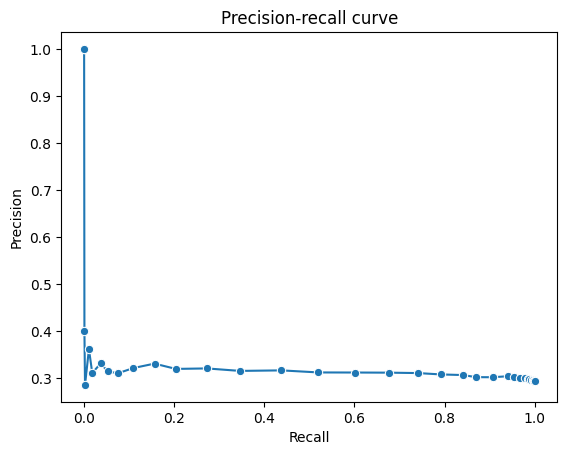

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall, y=precision, marker = 'o')

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()